In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
file_path = "house_price.csv"
tips = pd.read_csv(file_path)

In [6]:
X = tips["House Size"].values
y = tips["Price"].values

In [7]:
def locally_weighted_regression(x_query, X, y, tau):
    m = len(X)
    weights = np.exp(-((X - x_query) ** 2) / (2 * tau ** 2)) # Compute weights
    X_b = np.c_[np.ones(m), X] # Add bias term (column of ones)
    W = np.diag(weights)
    theta = np.linalg.pinv(X_b.T @ W @ X_b) @ (X_b.T @ W @ y)
    x_query_b = np.array([1, x_query])
    return x_query_b @ theta

In [9]:
tau = 300 # Bandwidth (adjust as needed)
x_query = 1600
predicted_tip = locally_weighted_regression(x_query, X, y, tau)
print(f"Predicted Price for a house size of 1600 sq.ft: {predicted_tip:.2f}")

Predicted Price for a house size of 1600 sq.ft: 223.00


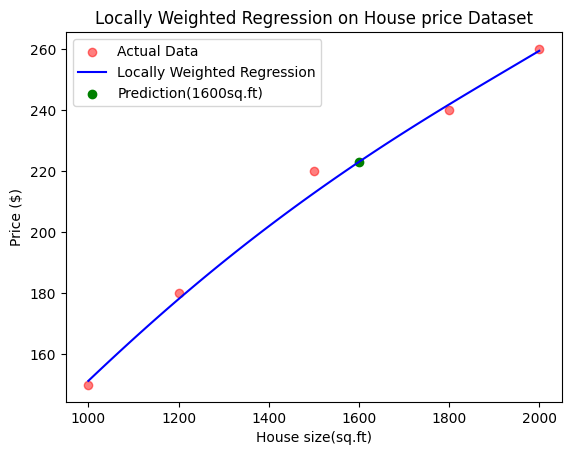

In [10]:
X_range = np.linspace(X.min(), X.max(), 100)
y_pred = np.array([locally_weighted_regression(x, X, y, tau) for x in X_range])
plt.scatter(X, y, color='red', alpha=0.5, label="Actual Data")
plt.plot(X_range, y_pred, color='blue', label="Locally Weighted Regression")
plt.scatter([x_query], [predicted_tip], color='green', marker='o', label="Prediction(1600sq.ft)")
plt.xlabel("House size(sq.ft)")
plt.ylabel("Price ($)")
plt.legend()
plt.title("Locally Weighted Regression on House price Dataset")
plt.show()

In [11]:
tau = 200 # Bandwidth (adjust as needed)
x_query = 1600
predicted_tip = locally_weighted_regression(x_query, X, y, tau)
print(f"Predicted Price for a house size of 1600 sq.ft: {predicted_tip:.2f}")

Predicted Price for a house size of 1600 sq.ft: 225.10


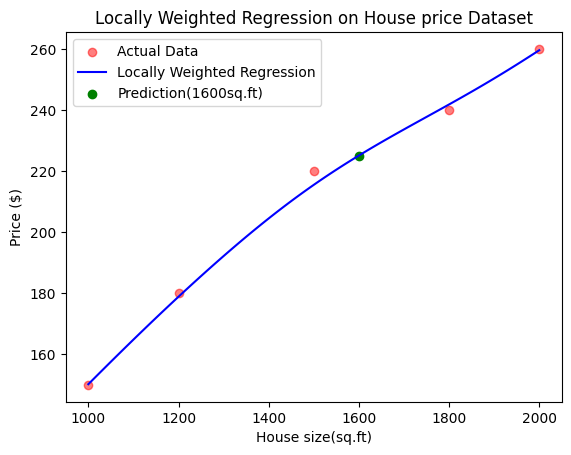

In [12]:
X_range = np.linspace(X.min(), X.max(), 100)
y_pred = np.array([locally_weighted_regression(x, X, y, tau) for x in X_range])
plt.scatter(X, y, color='red', alpha=0.5, label="Actual Data")
plt.plot(X_range, y_pred, color='blue', label="Locally Weighted Regression")
plt.scatter([x_query], [predicted_tip], color='green', marker='o', label="Prediction(1600sq.ft)")
plt.xlabel("House size(sq.ft)")
plt.ylabel("Price ($)")
plt.legend()
plt.title("Locally Weighted Regression on House price Dataset")
plt.show()
